# **About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting compny to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### **The company wants to know:**

1.   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2.   How well those variables describe the electric cycle demands

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm, t
from scipy.stats import binom,geom
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f,f_oneway
from scipy.stats import kruskal,shapiro,kstest
from scipy.stats import pearsonr, spearmanr
from scipy.stats import poisson,expon
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# **Exploratory Data Analysis**

In [154]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [155]:
Rows,Columns = df.shape
print("Rows :",Rows)
print("Columns :",Columns)

Rows : 10886
Columns : 12


In [156]:
start = np.min(df["datetime"])
end = np.max(df["datetime"])
print ("Data is from ",start, "to ",end)

Data is from  2011-01-01 00:00:00 to  2012-12-19 23:00:00


In [157]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [158]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [159]:
#converting time stamp and catoagortical columns
df["datetime"]= pd.to_datetime(df["datetime"])
df[["season","weather"]]= df[["season","weather"]].astype("object")

In [160]:
df["Date"] = pd. to_datetime(df["datetime"]). dt. date
df["time"] = pd. to_datetime(df["datetime"]). dt. time
df["month"] = pd. to_datetime(df["datetime"]). dt. month

In [161]:
df.drop(["holiday","atemp","casual","registered"],axis=1,inplace=True)



Reason to drop columns:
*   holiday data is present in workingday data
*   atemp data is almost similar to temp data
*   casual and rgistered data are summed in count data, so will work with count data only.Because our goal is to analyse electric cycle demands






In [162]:
df.dtypes

datetime      datetime64[ns]
season                object
workingday             int64
weather               object
temp                 float64
humidity               int64
windspeed            float64
count                  int64
Date                  object
time                  object
month                  int64
dtype: object

In [163]:
#checking missing values
df.isnull().sum()

datetime      0
season        0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
count         0
Date          0
time          0
month         0
dtype: int64

There are no missing values in data



In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   workingday  10886 non-null  int64         
 3   weather     10886 non-null  object        
 4   temp        10886 non-null  float64       
 5   humidity    10886 non-null  int64         
 6   windspeed   10886 non-null  float64       
 7   count       10886 non-null  int64         
 8   Date        10886 non-null  object        
 9   time        10886 non-null  object        
 10  month       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 935.6+ KB


In [165]:
#statistical summary of data
df.describe()

,workingday,temp,humidity,windspeed,count,month
count,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.680875,20.23086,61.886460,12.799395,191.574132,6.521495
std,0.466159,7.79159,19.245033,8.164537,181.144454,3.444373
min,0.000000,0.82000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,13.94000,47.000000,7.001500,42.000000,4.000000
50%,1.000000,20.50000,62.000000,12.998000,145.000000,7.000000
75%,1.000000,26.24000,77.000000,16.997900,284.000000,10.000000
max,1.000000,41.00000,100.000000,56.996900,977.000000,12.000000


In [166]:
# no of days user has used yulu according to season, weather and workingday/holiday
df[["season","workingday","weather"]].melt().groupby(by=['variable', 'value']).value_counts()

variable    value
season      1        2686
            2        2733
            3        2733
            4        2734
weather     1        7192
            2        2834
            3         859
            4           1
workingday  0        3474
            1        7412
dtype: int64

In [167]:
df.head()

,datetime,season,workingday,weather,temp,humidity,windspeed,count,Date,time,month
0,2011-01-01 00:00:00,1,0,1,9.84,81,0.0,16,2011-01-01,00:00:00,1
1,2011-01-01 01:00:00,1,0,1,9.02,80,0.0,40,2011-01-01,01:00:00,1
2,2011-01-01 02:00:00,1,0,1,9.02,80,0.0,32,2011-01-01,02:00:00,1
3,2011-01-01 03:00:00,1,0,1,9.84,75,0.0,13,2011-01-01,03:00:00,1
4,2011-01-01 04:00:00,1,0,1,9.84,75,0.0,1,2011-01-01,04:00:00,1


# **Univariate Analysis: distribution plots of all the continuous variable(s)**

#countplot for continous variables

<function matplotlib.pyplot.show(close=None, block=None)>

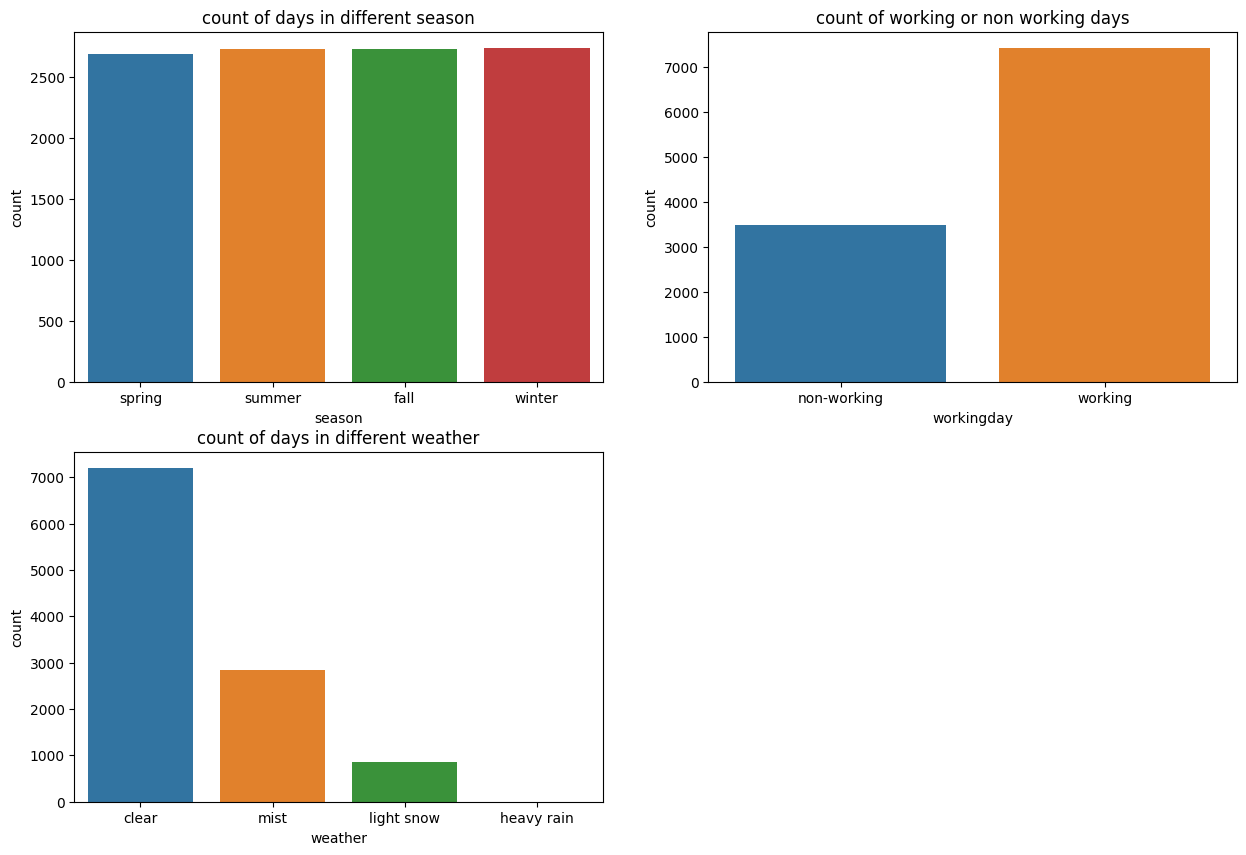

In [168]:
#countplot for continous variables

fig=plt.figure( figsize =(15,10))

plt.subplot(2,2,1)
sns.countplot(data=df,x="season",)
plt.title("count of days in different season")
plt.xticks(range(4),['spring','summer','fall','winter'])

plt.subplot(2,2,2)
sns.countplot(data=df,x="workingday")
plt.xticks(range(2),labels=["non-working","working"])
plt.title("count of working or non working days")

plt.subplot(2,2,3)
sns.countplot(data=df,x="weather")
plt.xticks(range(4),labels=["clear","mist","light snow","heavy rain"])
plt.title("count of days in different weather")

plt.show



*   no of days across all seasons are equal
*   count of working days are high comapre to non-working/holidays
*   no of days when weather was clear are high compare to others


# countplot for discreate variables

<function matplotlib.pyplot.show(close=None, block=None)>

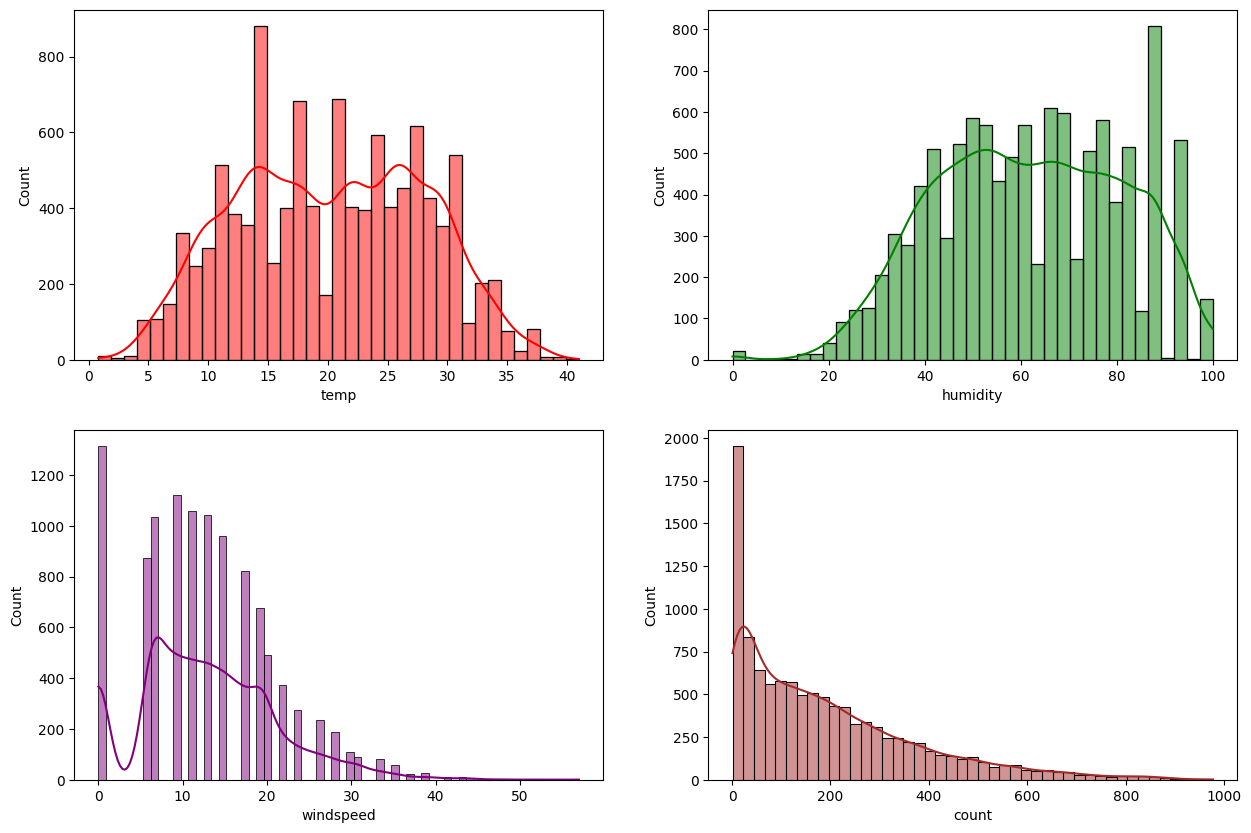

In [169]:
fig=plt.figure( figsize =(15,10))

plt.subplot(2,2,1)
sns.histplot(data=df,x="temp",kde=True,color="red")

plt.subplot(2,2,2)
sns.histplot(data=df,x="humidity",kde=True,color="green")

plt.subplot(2,2,3)
sns.histplot(data=df,x="windspeed",kde=True,color="purple")

plt.subplot(2,2,4)
sns.histplot(data=df,x="count",kde=True,color="brown")
plt.show

*   temp and huidity are normal distribution
*   windspeed looks like binomial ditribution
*   User count data looks like log normally distributed

<function matplotlib.pyplot.show(close=None, block=None)>

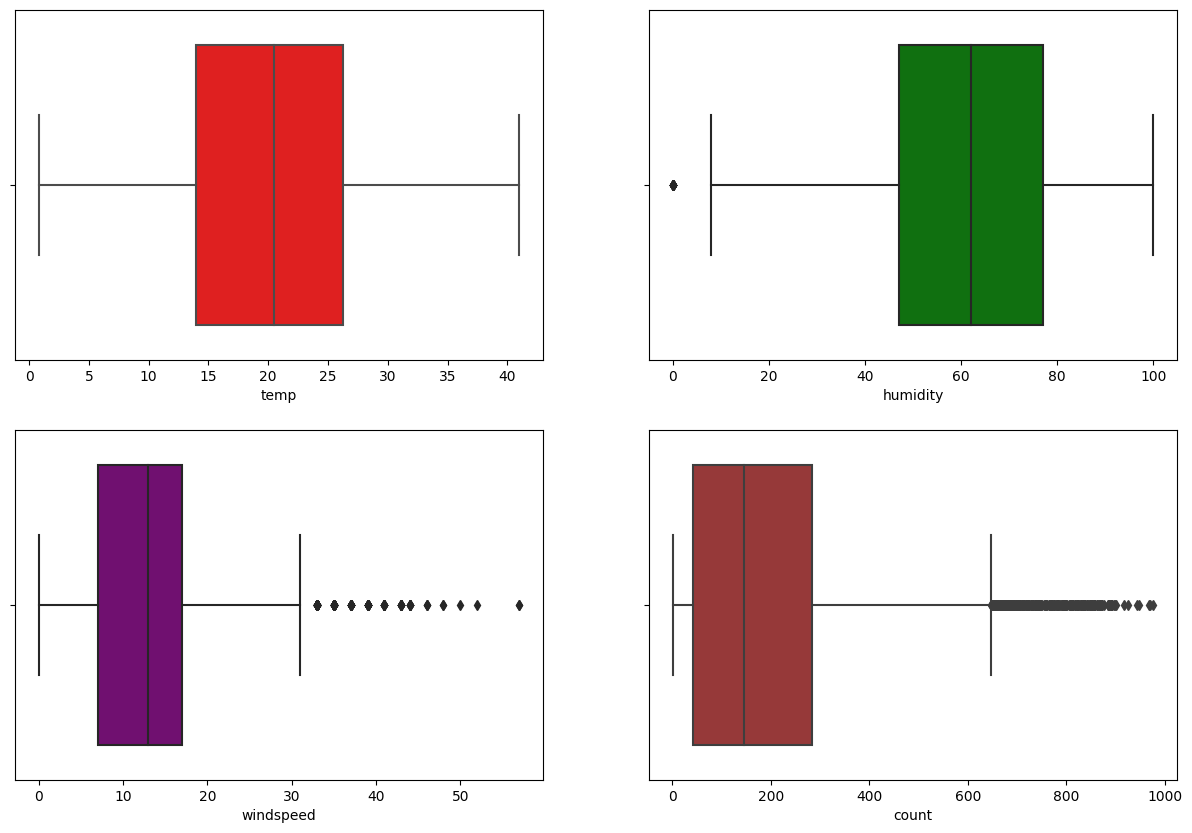

In [170]:
fig=plt.figure( figsize =(15,10))

plt.subplot(2,2,1)
sns.boxplot(data=df,x="temp",color="red")

plt.subplot(2,2,2)
sns.boxplot(data=df,x="humidity",color="green")

plt.subplot(2,2,3)
sns.boxplot(data=df,x="windspeed",color="purple")

plt.subplot(2,2,4)
sns.boxplot(data=df,x="count",color="brown")
plt.show



*   outliers aare present in windspeed , count, and humidity data
*   no outliers in temp data



# **Bivariate Analysis**

# Relationships between important variables

,weather,count
5631,4,164


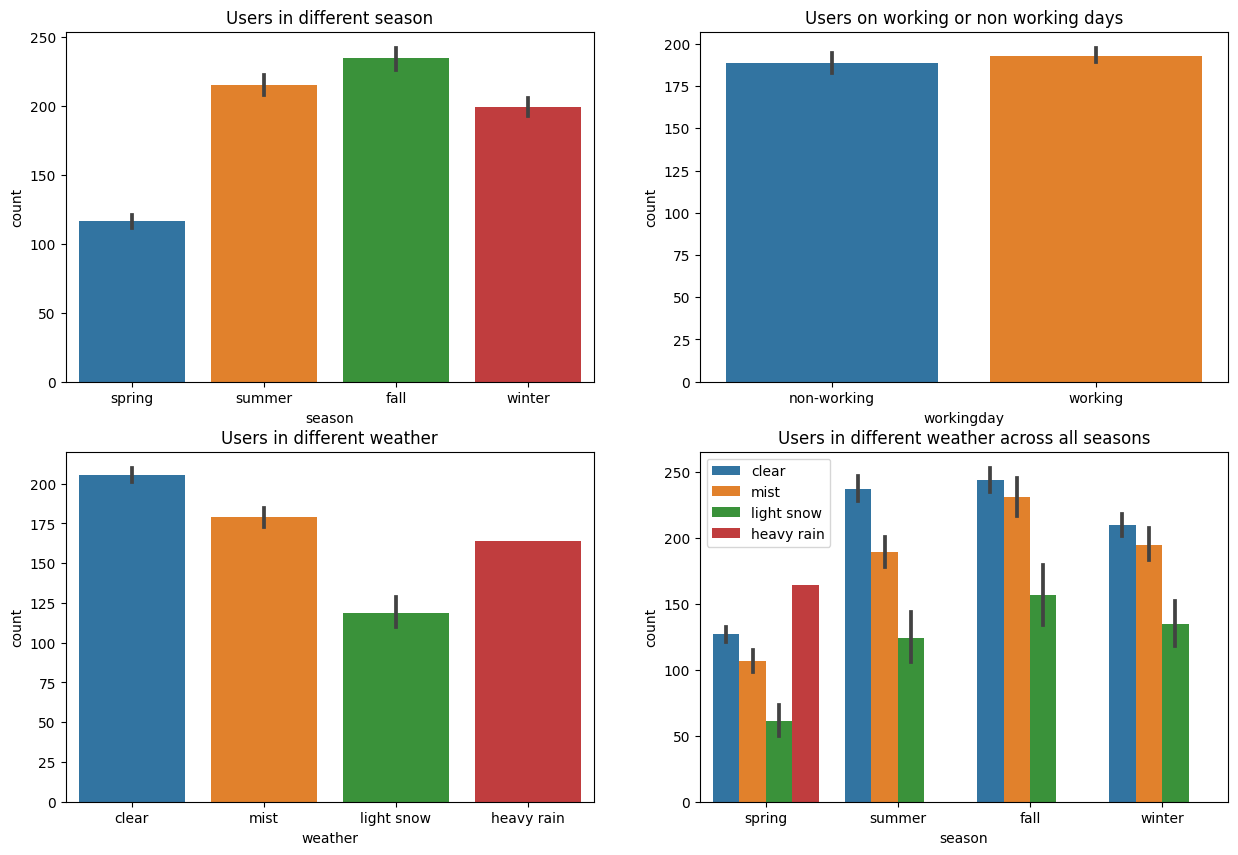

In [171]:
fig=plt.figure( figsize =(15,10))

plt.subplot(2,2,1)
sns.barplot(data=df,x="season",y="count")
plt.title("Users in different season")
plt.xticks(range(4),['spring','summer','fall','winter'])

plt.subplot(2,2,2)
sns.barplot(data=df,x="workingday",y="count")
plt.xticks(range(2),labels=["non-working","working"])
plt.title("Users on working or non working days")

plt.subplot(2,2,3)
sns.barplot(data=df,x="weather",y="count")
plt.xticks(range(4),labels=["clear","mist","light snow","heavy rain"])
plt.title("Users in different weather")

plt.subplot(2,2,4)
bp = sns.barplot(data=df,x="season",y="count",hue="weather")
plt.title("Users in different weather across all seasons")
plt.xticks(range(4),['spring','summer','fall','winter'])
handles,labels = bp.get_legend_handles_labels()
plt.legend(handles=handles,labels=["clear","mist","light snow","heavy rain"]) # how to change label
plt.show

df.loc[df["weather"]==4][["weather","count"]]


*   during fall highest number of people have used yulu
*   Usage of yulu bicycle during working and non working days are equal,even though no of working days are too high
*   in clear weather usage of yulu bicycle has been increased
*   no of have rain day is one, but in one day only 164 customers have used bicycle which higherr then total users during light snow



,weather,count
5631,4,164


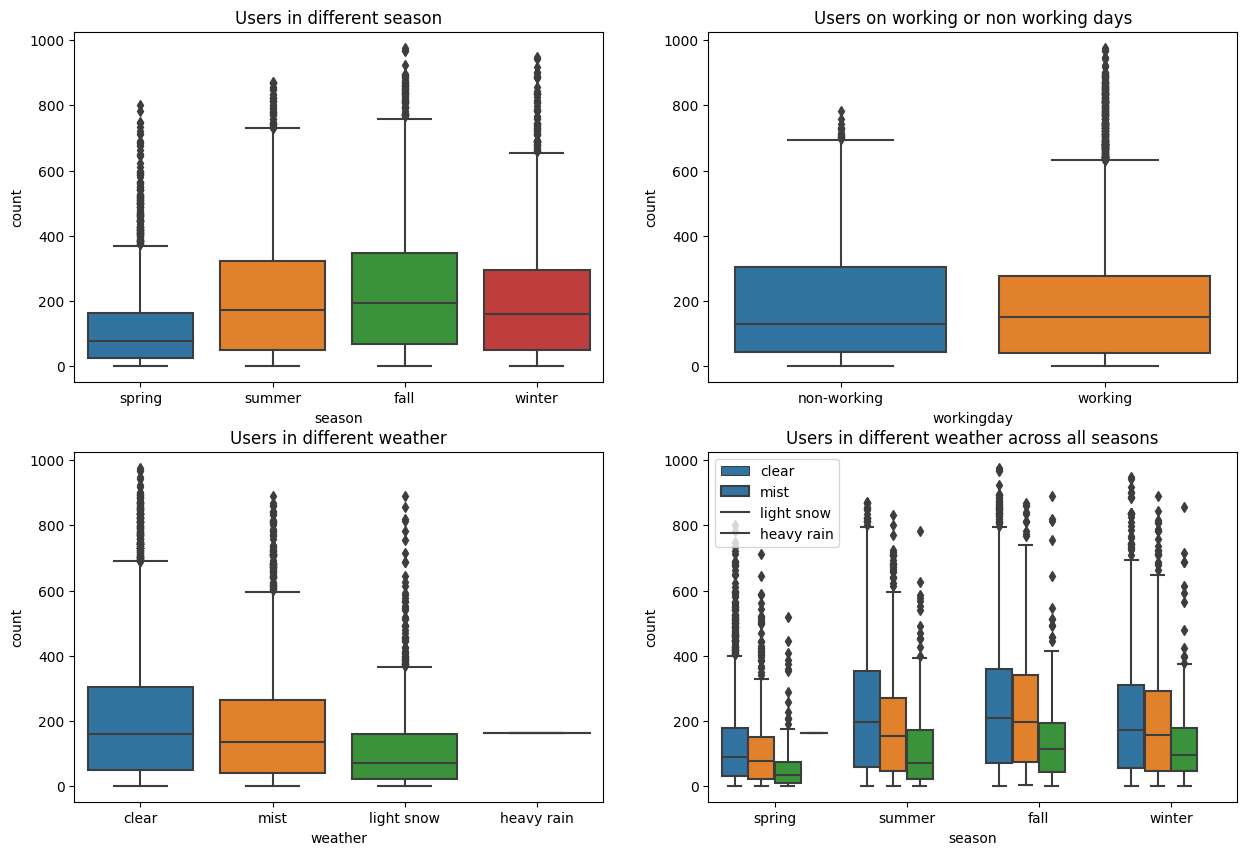

In [172]:
fig=plt.figure( figsize =(15,10))

plt.subplot(2,2,1)
sns.boxplot(data=df,x="season",y="count")
plt.title("Users in different season")
plt.xticks(range(4),['spring','summer','fall','winter'])

plt.subplot(2,2,2)
sns.boxplot(data=df,x="workingday",y="count")
plt.xticks(range(2),labels=["non-working","working"])
plt.title("Users on working or non working days")

plt.subplot(2,2,3)
sns.boxplot(data=df,x="weather",y="count")
plt.xticks(range(4),labels=["clear","mist","light snow","heavy rain"])
plt.title("Users in different weather")

plt.subplot(2,2,4)
sns.boxplot(data=df,x="season",y="count",hue="weather")
plt.title("Users in different weather across all seasons")
plt.xticks(range(4),['spring','summer','fall','winter'])
plt.legend(["clear","mist","light snow","heavy rain"]) # how to change label
plt.show
df.loc[df["weather"]==4][["weather","count"]]

outliares are present for season,workingdays and weather againest user count

<ipython-input-173-076aa6b13f0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm",annot=True)


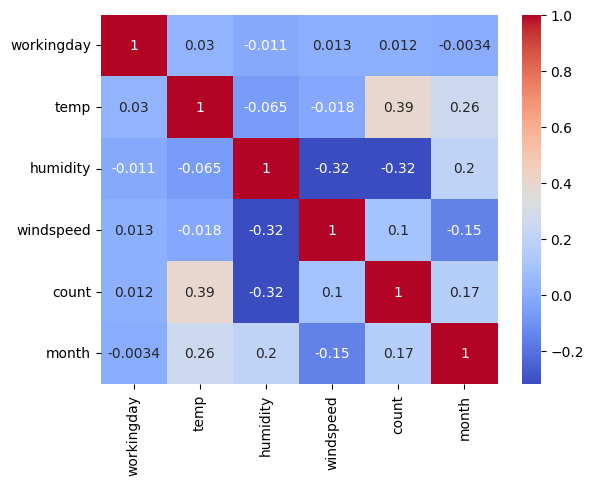

In [173]:
sns.heatmap(df.corr(), cmap="coolwarm",annot=True)
plt.show()

# **Hypothesis Testing**

**2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented**

In [174]:
non_working = df[df["workingday"]==0]["count"].values
working = df[df["workingday"]==1]["count"].values

In [175]:
Ho = "Working Day has NO effect on the number of electric cycles rented"
Ha = "Working Day has an effect on the number of electric cycles rented"
confidence = 0.95
alfa = 0.05

t_statistic,p_value=ttest_ind(non_working,working)
print("t_statistic :",t_statistic)
print("p_value :",p_value)
if p_value <alfa:
  print("Reject the null hypothesis")
else:
  print("fail to reject the null hypothesis")

t_statistic : -1.2096277376026694
p_value : 0.22644804226361348
fail to reject the null hypothesis




*   **p_value is greater then alfa(0.05) hence null hypothesis can not be rejected**
*   **Working Day has NO effect on the number of electric cycles rented**



**ANNOVA to check if No. of cycles rented is similar or different in different weather and season**

In [176]:
#No. of rented cycles according to different weather and season
season_1 = df.loc[df["season"]==1]
season_2 = df.loc[df["season"]==2]
season_3 = df.loc[df["season"]==3]
season_4 = df.loc[df["season"]==4]
weather_1 = df.loc[df["weather"]==1]
weather_2 = df.loc[df["weather"]==2]
weather_3 = df.loc[df["weather"]==3]
weather_4 = df.loc[df["weather"]==4]

<ipython-input-177-8cd088222976>:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=weather_4,x="count")


<function matplotlib.pyplot.show(close=None, block=None)>

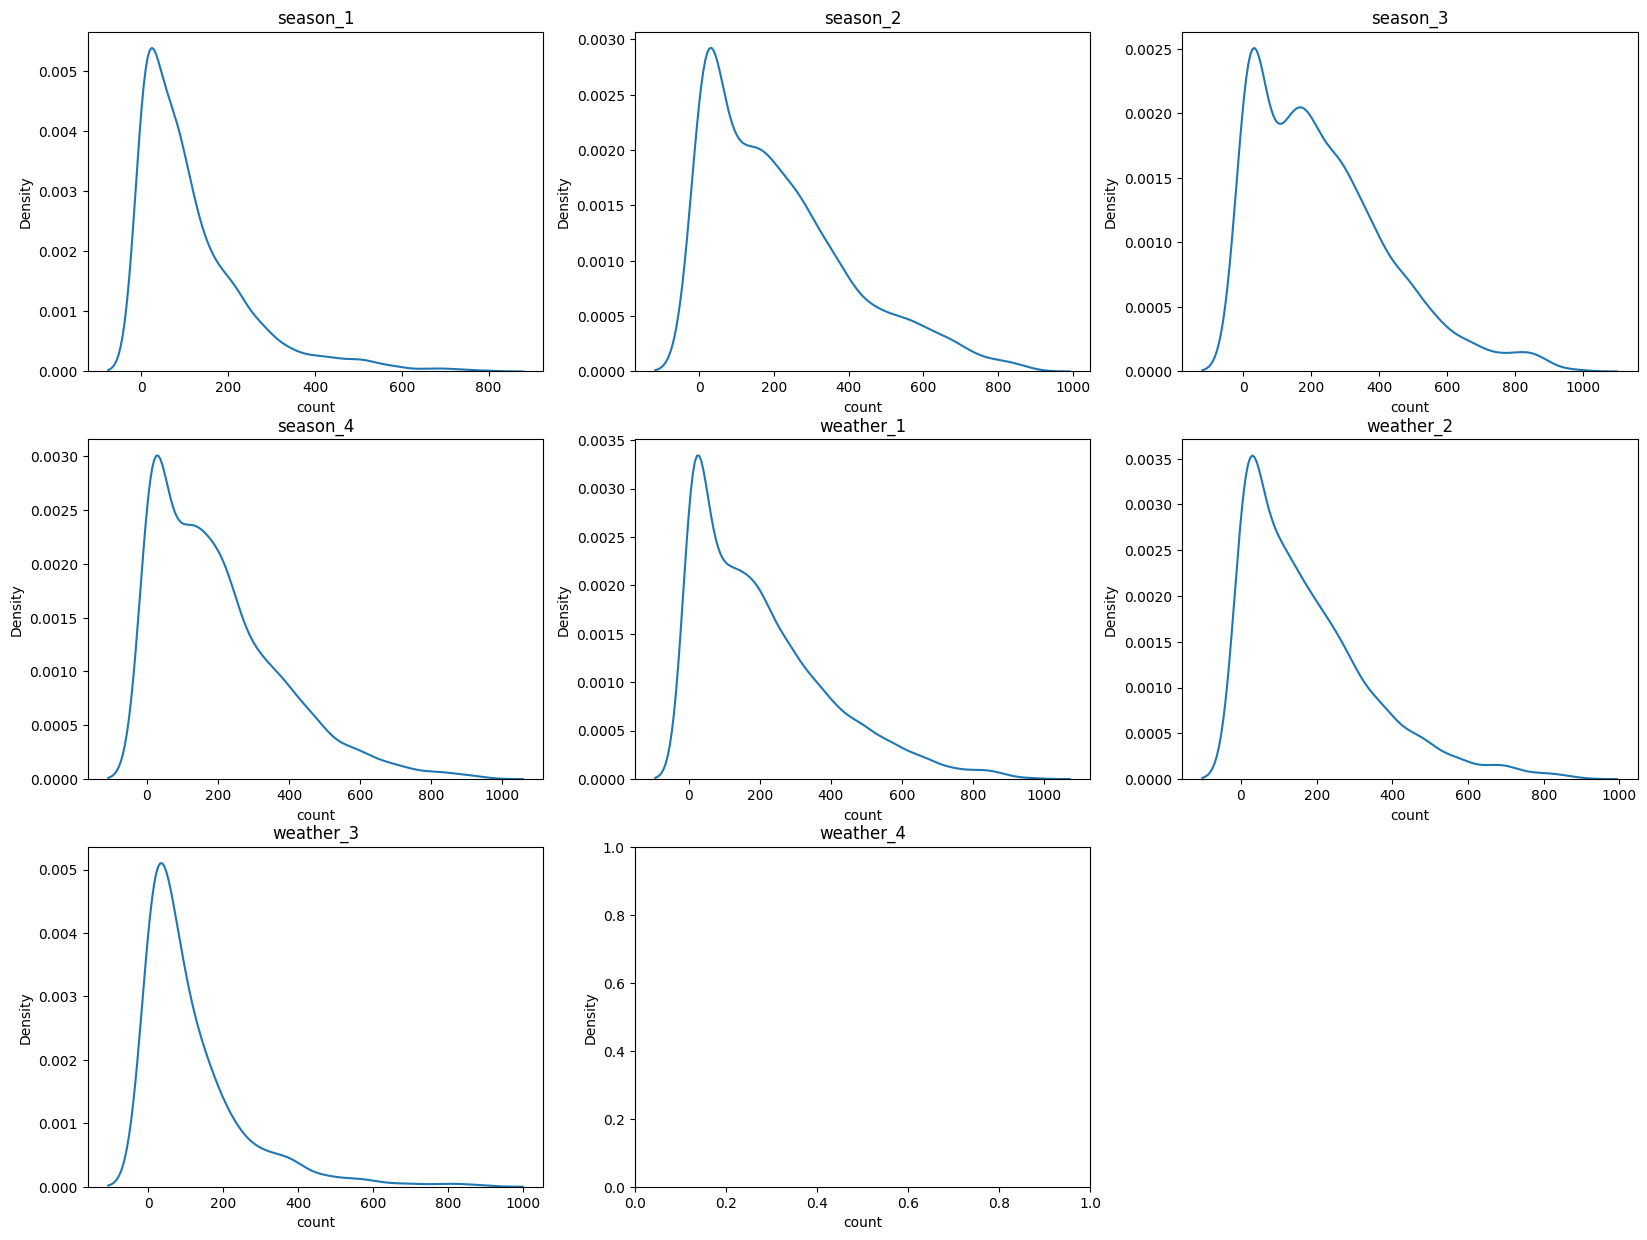

In [177]:
fig=plt.figure( figsize =(20,15))

plt.subplot(3,3,1)
sns.kdeplot(data=season_1,x="count")
plt.title("season_1")
plt.subplot(3,3,2)
sns.kdeplot(data=season_2,x="count")
plt.title("season_2")
plt.subplot(3,3,3)
sns.kdeplot(data=season_3,x="count")
plt.title("season_3")
plt.subplot(3,3,4)
sns.kdeplot(data=season_4,x="count")
plt.title("season_4")
plt.subplot(3,3,5)
sns.kdeplot(data=weather_1,x="count")
plt.title("weather_1")
plt.subplot(3,3,6)
sns.kdeplot(data=weather_2,x="count")
plt.title("weather_2")
plt.subplot(3,3,7)
sns.kdeplot(data=weather_3,x="count")
plt.title("weather_3")
plt.subplot(3,3,8)
sns.kdeplot(data=weather_4,x="count")
plt.title("weather_4")
plt.show

**Season and weather data is not normally distributed hence krskal statistics will be used for ANNOVA**

In [178]:
season_1 = df[df["season"]==1]["count"].values
season_2 = df[df["season"]==2]["count"].values
season_3 = df[df["season"]==3]["count"].values
season_4 = df[df["season"]==4]["count"].values
weather_1 = df[df["weather"]==1]["count"].values
weather_2 = df[df["weather"]==2]["count"].values
weather_3 = df[df["weather"]==3]["count"].values
weather_4 = df[df["weather"]==4]["count"].values

In [179]:
Ho = "No. of cycles rented is similar in different weather and season "
Ha ="No. of cycles rented is different in different weather and season"
confidence = 0.95
alfa = 0.10

statistic_value,p_value=kruskal(season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4)
print("statistic_value :",statistic_value)
print("p_value :",p_value)
if p_value <alfa:
  print(Ha)
else:
  print(Ho)

statistic_value : 904.7105757287106
p_value : 4.614440933900297e-191
No. of cycles rented is different in different weather and season




*   **p_value is less then alfa(0.05) hence reject the null hypothesis**
*   **No. of cycles rented is different in different weather and season**




**Chi-square test to check if Weather is dependent on the season**

In [180]:
chi_data = pd.crosstab(df["weather"],df["season"])
chi_data

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [181]:
Ho = "Weather is not dependent on the season"
Ha ="Weather is dependent on the season"
confidence = 0.95
alfa = 0.05
chi_stat,p_value,df,expected_freq=chi2_contingency(chi_data)
print("chi_stat :",chi_stat)
print("p_value :",p_value)
print("df :",df)
print("expected_freq :",expected_freq)
if p_value <alfa:
  print(Ha)
else:
  print(Ho)

chi_stat : 49.15865559689363
p_value : 1.5499250736864862e-07
df : 9
expected_freq : [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
Weather is dependent on the season


*   **`p_value is less then alfa(0.05) hence reject the null hypothesis`**
*   **Weather is dependent on the season**

# **Insights and Recomendations**

**Insights**
*   Count of yulu users are high during fall
*   More no of people are using yulu during clear weather
*   Also, during rain people are using more becuase in one rainy day 164 people have used yulu
*   Outliers ar present in season,weather and workingday data
*   with 95% confidence, statistically working day has no effect on the number of yuly cycles rented
*   with 95% confidence, statistically no of cycles rented is different in different weather and season
*   with 95% confidence, statistically weather is dependent on season

**Recomendations**


*   Bycycles stock should be high during fall and clear weather




